In [1]:
import pandas as pd
df_1 = pd.read_csv("Datasets/TASK-ML-INTERN.csv")
df_1

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [2]:
import numpy as np
import pandas as pd

def msc(input_data):
    """
    Perform Multiplicative Signal Correction (MSC) on the input data.
    Args:
        input_data (pd.DataFrame): Input DataFrame with numeric columns.
    Returns:
        pd.DataFrame: MSC-corrected DataFrame.
    """
    ref_spectrum = np.mean(input_data, axis=0)

    corrected_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        fit = np.polyfit(ref_spectrum, input_data.iloc[i, :], deg=1)
        a, b = fit
        corrected_data[i, :] = (input_data.iloc[i, :] - b) / a

    corrected_df = pd.DataFrame(corrected_data, columns=input_data.columns)
    return corrected_df
df_1.iloc[:, 1:-1] = msc(df_1.iloc[:, 1:-1])
print(df_1.head())

           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.435629  0.414444  0.427745  0.388176  0.401791  0.379987   
1  imagoai_corn_1  0.436666  0.422707  0.422280  0.415160  0.416441  0.408225   
2  imagoai_corn_2  0.465379  0.447263  0.449186  0.449973  0.436943  0.425406   
3  imagoai_corn_3  0.452956  0.457461  0.446953  0.443269  0.445652  0.443767   
4  imagoai_corn_4  0.462015  0.465692  0.448703  0.466043  0.443896  0.431826   

          6         7         8  ...       439       440       441       442  \
0  0.368852  0.355843  0.357471  ...  0.757812  0.765702  0.763068  0.752443   
1  0.393046  0.380020  0.391102  ...  0.728237  0.742652  0.747787  0.741354   
2  0.409314  0.406221  0.404274  ...  0.764335  0.750336  0.744127  0.757330   
3  0.442106  0.411053  0.398434  ...  0.732257  0.720041  0.726145  0.719270   
4  0.438461  0.422104  0.408425  ...  0.730976  0.733588  0.722729  0.724658   

        443       444       445 

In [3]:
df_1.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [4]:
target_variable = df_1["vomitoxin_ppb"]

In [5]:
missing_values = df_1.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [6]:
nan_values = df_1.isna().sum()
nan_values[nan_values > 0]

Series([], dtype: int64)

In [7]:
import numpy as np
df_1.replace([np.inf, -np.inf], np.nan, inplace=True)
infinite_values = (df_1 == np.inf).sum() + (df_1 == -np.inf).sum()
print(infinite_values)

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [8]:
nan_values = df_1.isna().sum()
nan_values[nan_values > 0]

Series([], dtype: int64)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
x = df_1.iloc[:, :-1]
y = df_1.iloc[:, -1]

In [10]:
x

,hsi_id,0,1,2,3,4,5,6,7,8,...,438,439,440,441,442,443,444,445,446,447
0,imagoai_corn_0,0.435629,0.414444,0.427745,0.388176,0.401791,0.379987,0.368852,0.355843,0.357471,...,0.725607,0.757812,0.765702,0.763068,0.752443,0.742925,0.738655,0.759005,0.744008,0.751502
1,imagoai_corn_1,0.436666,0.422707,0.422280,0.415160,0.416441,0.408225,0.393046,0.380020,0.391102,...,0.747358,0.728237,0.742652,0.747787,0.741354,0.746718,0.721070,0.742271,0.741861,0.733719
2,imagoai_corn_2,0.465379,0.447263,0.449186,0.449973,0.436943,0.425406,0.409314,0.406221,0.404274,...,0.752485,0.764335,0.750336,0.744127,0.757330,0.757763,0.736777,0.739822,0.752068,0.746157
3,imagoai_corn_3,0.452956,0.457461,0.446953,0.443269,0.445652,0.443767,0.442106,0.411053,0.398434,...,0.717786,0.732257,0.720041,0.726145,0.719270,0.741082,0.727888,0.731914,0.744364,0.722768
4,imagoai_corn_4,0.462015,0.465692,0.448703,0.466043,0.443896,0.431826,0.438461,0.422104,0.408425,...,0.739383,0.730976,0.733588,0.722729,0.724658,0.723707,0.706398,0.735907,0.721792,0.713876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.486558,0.453317,0.451452,0.446922,0.438345,0.423303,0.427708,0.430272,0.423353,...,0.743327,0.749432,0.732548,0.719327,0.741088,0.726986,0.722753,0.742383,0.741886,0.724073
496,imagoai_corn_496,0.459521,0.443160,0.426482,0.420929,0.387791,0.397464,0.404858,0.384221,0.394613,...,0.723686,0.755382,0.742694,0.745577,0.741987,0.725918,0.728442,0.740124,0.728692,0.728730
497,imagoai_corn_497,0.451581,0.465413,0.464297,0.471717,0.454268,0.424362,0.429029,0.429594,0.410699,...,0.729586,0.732020,0.725326,0.714159,0.717001,0.716543,0.707733,0.715978,0.709466,0.741016
498,imagoai_corn_498,0.443909,0.477956,0.468262,0.432753,0.466829,0.441277,0.441000,0.426766,0.431332,...,0.726550,0.717306,0.737489,0.729925,0.739666,0.738871,0.708352,0.731345,0.727440,0.734168


In [11]:
x

,hsi_id,0,1,2,3,4,5,6,7,8,...,438,439,440,441,442,443,444,445,446,447
0,imagoai_corn_0,0.435629,0.414444,0.427745,0.388176,0.401791,0.379987,0.368852,0.355843,0.357471,...,0.725607,0.757812,0.765702,0.763068,0.752443,0.742925,0.738655,0.759005,0.744008,0.751502
1,imagoai_corn_1,0.436666,0.422707,0.422280,0.415160,0.416441,0.408225,0.393046,0.380020,0.391102,...,0.747358,0.728237,0.742652,0.747787,0.741354,0.746718,0.721070,0.742271,0.741861,0.733719
2,imagoai_corn_2,0.465379,0.447263,0.449186,0.449973,0.436943,0.425406,0.409314,0.406221,0.404274,...,0.752485,0.764335,0.750336,0.744127,0.757330,0.757763,0.736777,0.739822,0.752068,0.746157
3,imagoai_corn_3,0.452956,0.457461,0.446953,0.443269,0.445652,0.443767,0.442106,0.411053,0.398434,...,0.717786,0.732257,0.720041,0.726145,0.719270,0.741082,0.727888,0.731914,0.744364,0.722768
4,imagoai_corn_4,0.462015,0.465692,0.448703,0.466043,0.443896,0.431826,0.438461,0.422104,0.408425,...,0.739383,0.730976,0.733588,0.722729,0.724658,0.723707,0.706398,0.735907,0.721792,0.713876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.486558,0.453317,0.451452,0.446922,0.438345,0.423303,0.427708,0.430272,0.423353,...,0.743327,0.749432,0.732548,0.719327,0.741088,0.726986,0.722753,0.742383,0.741886,0.724073
496,imagoai_corn_496,0.459521,0.443160,0.426482,0.420929,0.387791,0.397464,0.404858,0.384221,0.394613,...,0.723686,0.755382,0.742694,0.745577,0.741987,0.725918,0.728442,0.740124,0.728692,0.728730
497,imagoai_corn_497,0.451581,0.465413,0.464297,0.471717,0.454268,0.424362,0.429029,0.429594,0.410699,...,0.729586,0.732020,0.725326,0.714159,0.717001,0.716543,0.707733,0.715978,0.709466,0.741016
498,imagoai_corn_498,0.443909,0.477956,0.468262,0.432753,0.466829,0.441277,0.441000,0.426766,0.431332,...,0.726550,0.717306,0.737489,0.729925,0.739666,0.738871,0.708352,0.731345,0.727440,0.734168


In [12]:

y

0      1100.0
1      1000.0
2      1300.0
3      1300.0
4       220.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 500, dtype: float64

In [13]:
Q1 = df_1.iloc[:, 1:-1].quantile(0.25)
Q3 = df_1.iloc[:, 1:-1].quantile(0.75)
IQR = Q3 - Q1
outlier_counts = ((df_1.iloc[:, 1:-1] < (Q1 - 1.5 * IQR)) | (df_1.iloc[:, 1:-1] > (Q3 + 1.5 * IQR))).sum()
print(outlier_counts[outlier_counts > 0])

0      16
1       6
2      14
3       2
4       5
       ..
443    20
444    27
445    19
446    30
447    21
Length: 444, dtype: int64


In [14]:
print(df_1.dtypes)

hsi_id            object
0                float64
1                float64
2                float64
3                float64
                  ...   
444              float64
445              float64
446              float64
447              float64
vomitoxin_ppb    float64
Length: 450, dtype: object


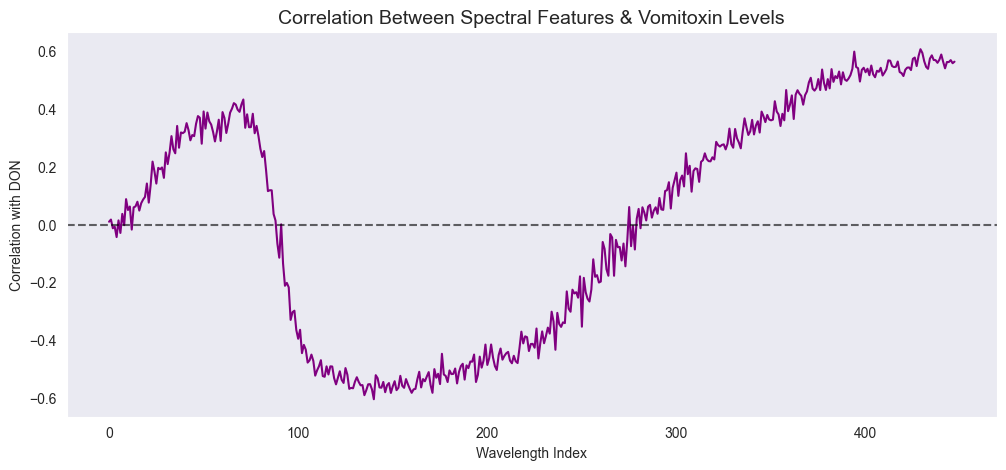

In [15]:
corr_values = df_1.iloc[:, 1:-1].corrwith(df_1["vomitoxin_ppb"])

# Plot correlation
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(len(corr_values)), y=corr_values, color="purple")
plt.title("Correlation Between Spectral Features & Vomitoxin Levels", fontsize=14)
plt.xlabel("Wavelength Index")
plt.ylabel("Correlation with DON")
plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.show()

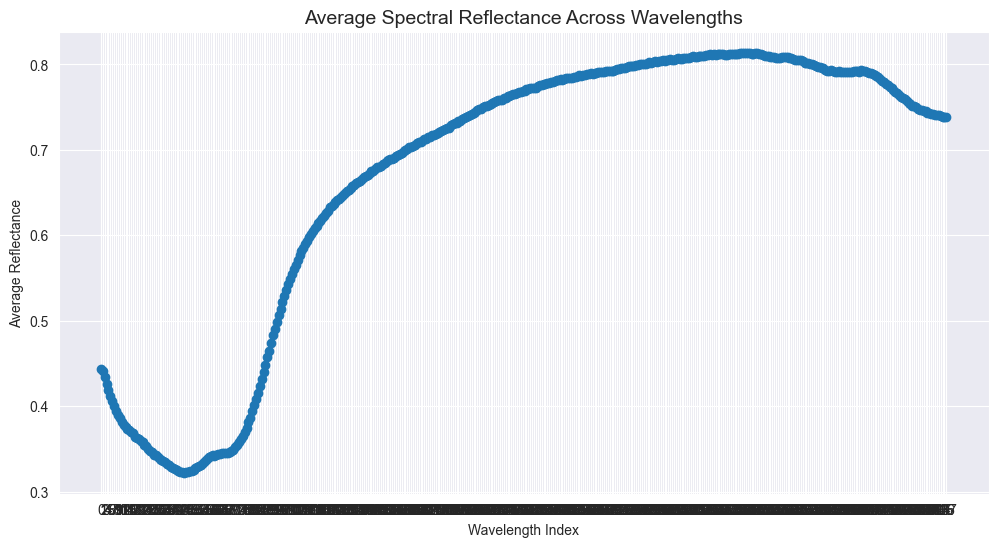

In [16]:
#Line Plot: Average Reflectance Across Wavelengths
spectral_columns = df_1.columns[1:-1]  
mean_reflectance = df_1[spectral_columns].mean()
plt.figure(figsize=(12, 6))
plt.plot(mean_reflectance.index, mean_reflectance.values, marker='o', linestyle='-')
plt.xlabel("Wavelength Index")
plt.ylabel("Average Reflectance")
plt.title("Average Spectral Reflectance Across Wavelengths", fontsize=14)
plt.grid()
plt.show()

In [17]:
#We can simply remove the outliers but it can also lead to loss of information if some values are valid so to keep the information we will use Log transformation
import numpy as np
df_1["DON_Log"] = np.log1p(df_1["vomitoxin_ppb"] + 1e-5)

In [18]:
df_1

,hsi_id,0,1,2,3,4,5,6,7,8,...,440,441,442,443,444,445,446,447,vomitoxin_ppb,DON_Log
0,imagoai_corn_0,0.435629,0.414444,0.427745,0.388176,0.401791,0.379987,0.368852,0.355843,0.357471,...,0.765702,0.763068,0.752443,0.742925,0.738655,0.759005,0.744008,0.751502,1100.0,7.003974
1,imagoai_corn_1,0.436666,0.422707,0.422280,0.415160,0.416441,0.408225,0.393046,0.380020,0.391102,...,0.742652,0.747787,0.741354,0.746718,0.721070,0.742271,0.741861,0.733719,1000.0,6.908755
2,imagoai_corn_2,0.465379,0.447263,0.449186,0.449973,0.436943,0.425406,0.409314,0.406221,0.404274,...,0.750336,0.744127,0.757330,0.757763,0.736777,0.739822,0.752068,0.746157,1300.0,7.170888
3,imagoai_corn_3,0.452956,0.457461,0.446953,0.443269,0.445652,0.443767,0.442106,0.411053,0.398434,...,0.720041,0.726145,0.719270,0.741082,0.727888,0.731914,0.744364,0.722768,1300.0,7.170888
4,imagoai_corn_4,0.462015,0.465692,0.448703,0.466043,0.443896,0.431826,0.438461,0.422104,0.408425,...,0.733588,0.722729,0.724658,0.723707,0.706398,0.735907,0.721792,0.713876,220.0,5.398163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.486558,0.453317,0.451452,0.446922,0.438345,0.423303,0.427708,0.430272,0.423353,...,0.732548,0.719327,0.741088,0.726986,0.722753,0.742383,0.741886,0.724073,1200.0,7.090910
496,imagoai_corn_496,0.459521,0.443160,0.426482,0.420929,0.387791,0.397464,0.404858,0.384221,0.394613,...,0.742694,0.745577,0.741987,0.725918,0.728442,0.740124,0.728692,0.728730,0.0,0.000010
497,imagoai_corn_497,0.451581,0.465413,0.464297,0.471717,0.454268,0.424362,0.429029,0.429594,0.410699,...,0.725326,0.714159,0.717001,0.716543,0.707733,0.715978,0.709466,0.741016,0.0,0.000010
498,imagoai_corn_498,0.443909,0.477956,0.468262,0.432753,0.466829,0.441277,0.441000,0.426766,0.431332,...,0.737489,0.729925,0.739666,0.738871,0.708352,0.731345,0.727440,0.734168,0.0,0.000010


In [19]:
target_col = df_1.iloc[:, -1]

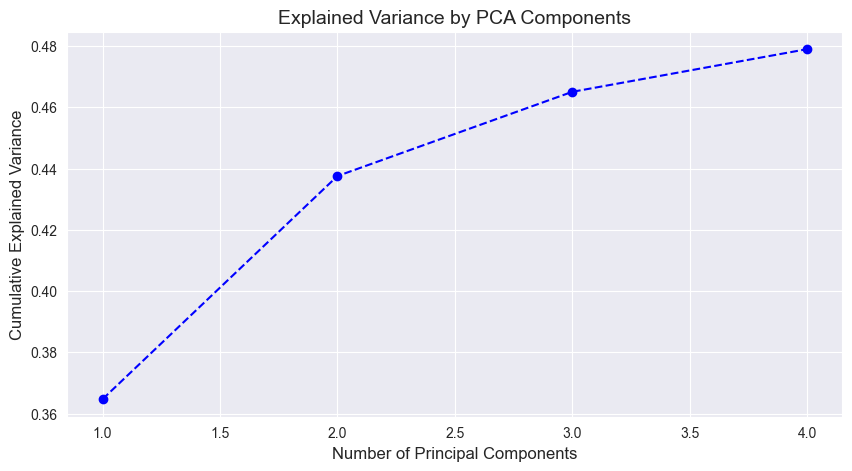

         PC1       PC2       PC3       PC4    Target
0   1.639467 -7.568442  0.830519  1.105022  7.003974
1  -2.619540 -3.106622  0.082333 -0.943346  6.908755
2 -13.142801  6.418091 -3.909310 -3.964636  7.170888
3   7.037341  2.313361  2.524736  3.148044  7.170888
4   1.035692  8.801107 -1.498329  0.358982  5.398163


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = df_1.iloc[:, 1:-1]
target = df_1.iloc[:, -1]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA(n_components=4)
principal_components = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Explained Variance by PCA Components', fontsize=14)
plt.grid()
plt.show()
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(4)])
pca_df['Target'] = target
print(pca_df.head())

In [21]:
pca_df["Target"] = target

In [22]:
pca_df

,PC1,PC2,PC3,PC4,Target
0,1.639467,-7.568442,0.830519,1.105022,7.003974
1,-2.619540,-3.106622,0.082333,-0.943346,6.908755
2,-13.142801,6.418091,-3.909310,-3.964636,7.170888
3,7.037341,2.313361,2.524736,3.148044,7.170888
4,1.035692,8.801107,-1.498329,0.358982,5.398163
...,...,...,...,...,...
495,1.258505,5.354739,1.252892,-0.301232,7.090910
496,2.167821,-2.467791,-4.060649,-3.034414,0.000010
497,10.047907,6.174288,1.033906,-1.617312,0.000010
498,5.345151,4.734563,3.693331,2.402814,0.000010


In [23]:
pca_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Target'], dtype='object')

In [24]:
from sklearn.model_selection import train_test_split
y = pca_df.Target
x = pca_df.drop(columns=['Target'])

In [25]:
x

,PC1,PC2,PC3,PC4
0,1.639467,-7.568442,0.830519,1.105022
1,-2.619540,-3.106622,0.082333,-0.943346
2,-13.142801,6.418091,-3.909310,-3.964636
3,7.037341,2.313361,2.524736,3.148044
4,1.035692,8.801107,-1.498329,0.358982
...,...,...,...,...
495,1.258505,5.354739,1.252892,-0.301232
496,2.167821,-2.467791,-4.060649,-3.034414
497,10.047907,6.174288,1.033906,-1.617312
498,5.345151,4.734563,3.693331,2.402814


In [26]:
y

0      7.003974
1      6.908755
2      7.170888
3      7.170888
4      5.398163
         ...   
495    7.090910
496    0.000010
497    0.000010
498    0.000010
499    7.244942
Name: Target, Length: 500, dtype: float64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
import numpy as np
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    diff = np.abs(y_true - y_pred) / denominator
    diff = np.where(denominator == 0, 0, diff)  # Handle division by zero
    return np.mean(diff) * 100
smape_scorer = make_scorer(smape, greater_is_better=False)
X = pca_df.drop(columns=['Target'])
y = pca_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
lasso = GridSearchCV(Lasso(), param_grid=lasso_params, cv=5, scoring=smape_scorer)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.best_estimator_.predict(X_test)
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}
ridge = GridSearchCV(Ridge(), param_grid=ridge_params, cv=5, scoring=smape_scorer)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.best_estimator_.predict(X_test)

linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred_linear = linear.predict(X_test)

dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt = GridSearchCV(DecisionTreeRegressor(), param_grid=dt_params, cv=5, scoring=smape_scorer)
dt.fit(X_train, y_train)

y_pred_dt = dt.best_estimator_.predict(X_test)
rf_params = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = GridSearchCV(RandomForestRegressor(), param_grid=rf_params, cv=5, scoring=smape_scorer)
rf.fit(X_train, y_train)

y_pred_rf = rf.best_estimator_.predict(X_test)
def evaluate_model(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    smape_value = smape(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"SMAPE: {smape_value:.2f}%")
    print(f"R²: {r2:.4f}")

evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Linear Regression", y_test, y_pred_linear)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

print("\nBest Lasso Parameters:", lasso.best_params_)
print("Best Ridge Parameters:", ridge.best_params_)
print("Best Decision Tree Parameters:", dt.best_params_)
print("Best Random Forest Parameters:", rf.best_params_)


Lasso Regression Results:
MSE: 7.1510
RMSE: 2.6741
MAE: 1.9966
SMAPE: 48.00%
R²: 0.1192

Ridge Regression Results:
MSE: 6.2768
RMSE: 2.5054
MAE: 1.8539
SMAPE: 47.56%
R²: 0.2268

Linear Regression Results:
MSE: 6.2812
RMSE: 2.5062
MAE: 1.8554
SMAPE: 47.61%
R²: 0.2263

Decision Tree Results:
MSE: 6.7909
RMSE: 2.6059
MAE: 2.0321
SMAPE: 52.70%
R²: 0.1635

Random Forest Results:
MSE: 6.0606
RMSE: 2.4618
MAE: 1.8451
SMAPE: 49.15%
R²: 0.2535

Best Lasso Parameters: {'alpha': 10}
Best Ridge Parameters: {'alpha': 100}
Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Random Forest Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


[0]	train-rmse:2.87188	val-rmse:2.65161
[1]	train-rmse:2.74134	val-rmse:2.57887
[2]	train-rmse:2.60795	val-rmse:2.54016
[3]	train-rmse:2.49827	val-rmse:2.50639
[4]	train-rmse:2.38086	val-rmse:2.47894
[5]	train-rmse:2.29300	val-rmse:2.46211
[6]	train-rmse:2.19748	val-rmse:2.46151
[7]	train-rmse:2.10326	val-rmse:2.45510
[8]	train-rmse:2.02689	val-rmse:2.46170
[9]	train-rmse:1.95702	val-rmse:2.46539
[10]	train-rmse:1.87701	val-rmse:2.48218
[11]	train-rmse:1.81194	val-rmse:2.47632
[12]	train-rmse:1.74591	val-rmse:2.47143
[13]	train-rmse:1.68600	val-rmse:2.46694
[14]	train-rmse:1.63220	val-rmse:2.45821
[15]	train-rmse:1.59032	val-rmse:2.46987
[16]	train-rmse:1.54350	val-rmse:2.47409
[17]	train-rmse:1.51747	val-rmse:2.48012
[18]	train-rmse:1.46669	val-rmse:2.48132
[19]	train-rmse:1.44333	val-rmse:2.50370
[20]	train-rmse:1.40126	val-rmse:2.50704
[21]	train-rmse:1.36014	val-rmse:2.51462
[22]	train-rmse:1.32465	val-rmse:2.52440
[23]	train-rmse:1.29006	val-rmse:2.53574
[24]	train-rmse:1.26204	va

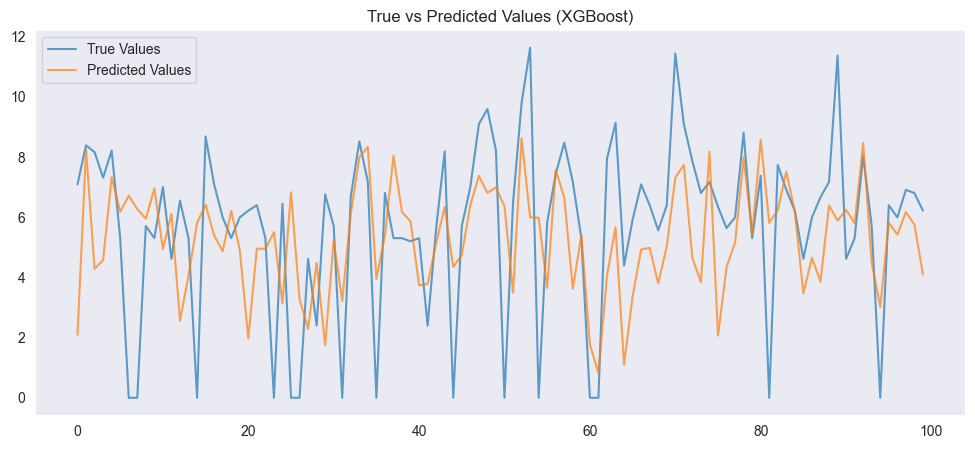

In [32]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X = pca_df.drop(columns=['Target'])
y = pca_df['Target']

# Split data before conversion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays if they are DataFrames
if not isinstance(X_train, np.ndarray):
    X_train = X_train.values
if not isinstance(X_test, np.ndarray):
    X_test = X_test.values
if not isinstance(y_train, np.ndarray):
    y_train = y_train.values
if not isinstance(y_test, np.ndarray):
    y_test = y_test.values

# Flatten the features for XGBoost
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.reshape(-1)  # Ensure target is 1D
y_test = y_test.reshape(-1)

# Train-Validation Split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

# Define model parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'learning_rate': 0.1
}

# Train model using xgb.train()
evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(params, dtrain, num_boost_round=500, early_stopping_rounds=20, evals=evals, verbose_eval=True)

# Predict on test data
y_pred = model.predict(dtest)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nTest MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")

# Accuracy calculation (guard against division by zero)
max_y_test = np.max(y_test)
if max_y_test > 0:
    accuracy = (1 - mae / max_y_test) * 100
else:
    accuracy = 0

print(f"Test Accuracy: {accuracy:.2f}%")

# Cross-validation to further validate performance
cv_results = xgb.cv(
    params=params,
    dtrain=xgb.DMatrix(X_train, label=y_train),
    nfold=5,
    metrics=['rmse', 'mae'],
    early_stopping_rounds=20,
    seed=42
)

print(f"\nCross-validation Results:\n{cv_results.tail(1)}")

# Plot true vs predicted values for a sample
plt.figure(figsize=(12, 5))
plt.plot(y_test[:100], label="True Values", alpha=0.7)
plt.plot(y_pred[:100], label="Predicted Values", alpha=0.7)
plt.title('True vs Predicted Values (XGBoost)')
plt.legend()
plt.show()


In [28]:
x_train

,PC1,PC2,PC3,PC4
249,-2.670916,4.500825,-0.862720,1.774261
433,-2.864218,-5.304962,6.080868,-2.327925
19,3.415607,6.086177,-3.696504,-2.656901
322,10.425229,-2.246379,-1.015235,-3.262445
332,-2.477625,8.418743,4.470581,0.989193
...,...,...,...,...
106,0.468461,3.946852,1.186709,-2.499910
270,6.948784,2.527535,2.387687,-0.620282
348,0.696953,-3.397500,-6.320970,1.188747
435,3.455676,-2.859119,0.807721,-0.867676


In [29]:
x_text

,PC1,PC2,PC3,PC4
361,3.742614,2.919876,0.238695,-1.455666
73,-4.844155,4.309902,-4.325623,3.730129
374,-0.271935,-8.902080,-8.041303,-1.393774
155,3.138143,6.827511,-2.623588,1.110325
104,-10.774188,4.797734,-0.934959,2.760981
...,...,...,...,...
347,6.838203,-0.678873,5.786884,-0.983636
86,11.520328,-12.355363,-1.922614,-1.729931
75,-0.187752,-1.878541,7.367668,-3.107862
438,2.295891,-1.564909,-0.316971,-1.537285
